# Summary

 - Accuracy too low (at most 80%)
 - CatBoost overall best regressor for the data

# Data Processing and EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from datetime import timedelta

In [3]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 20

In [ ]:
#from cycler import cycler
#plt.style.use('dark_background')
#plt.style.use('dark_background')
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['teal', 'magenta', 'yellow'])

In [4]:
CUTOFF_TRAIN = '2018-07-15'  # ~80%
CUTOFF_TRAINVAL = '2018-10-01' # ~ 80%

df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df['Sneaker Name'] = df['Brand'] + ' - ' + df['Sneaker Name']
df['DaysStored'] = pd.Series(df['Order Date'] - df['Release Date']).apply(lambda x: x.days)
df = df[['Order Date', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
df

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,1097.0,342
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,685.0,282
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,690.0,282
3,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,1075.0,282
4,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,828.0,202
...,...,...,...,...,...
99951,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.0,565.0,49
99952,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.5,598.0,49
99953,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,5.5,605.0,49
99954,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,11.0,650.0,49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Sneaker Name  99956 non-null  object        
 2   Shoe Size     99956 non-null  float64       
 3   Sale Price    99956 non-null  float64       
 4   DaysStored    99956 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.8+ MB


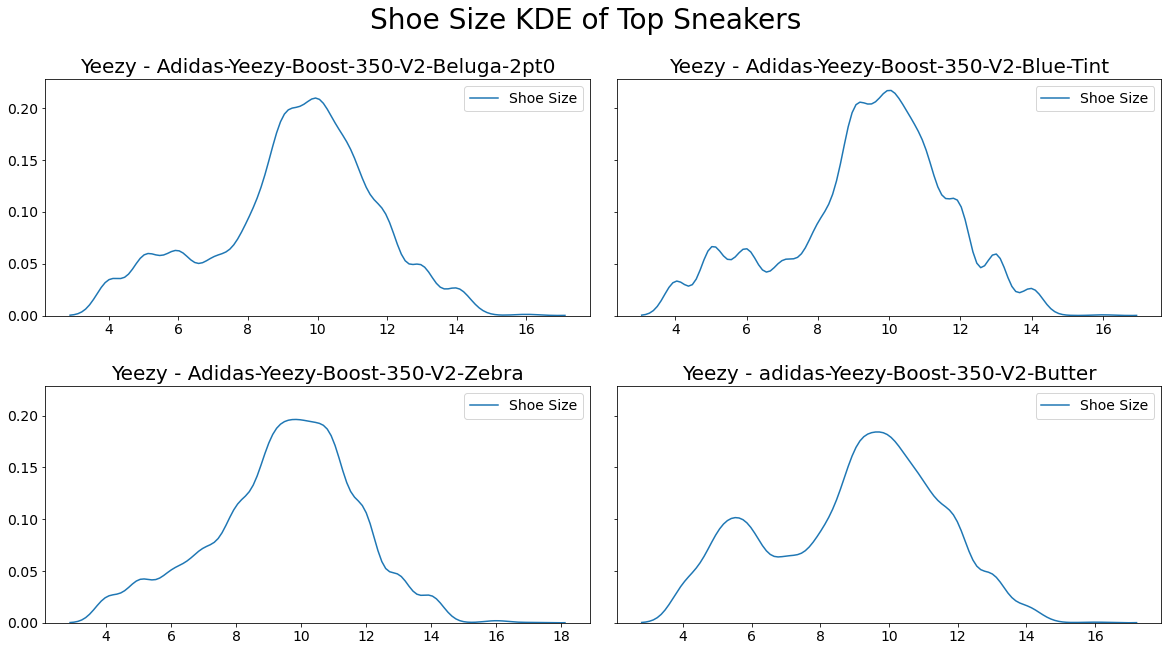

In [6]:
top_sneakers = df.groupby(['Sneaker Name', 'Shoe Size']).size().reset_index().nlargest(9, 0)['Sneaker Name'].to_list()
top_sneakers = sorted(list(set(top_sneakers)))

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharey = True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Shoe Size KDE of Top Sneakers')

x, y = 0, 0
for i in range(0, len(top_sneakers)):
    x, y = int(i/2), i % 2
    sns.kdeplot(data=df[df['Sneaker Name']==top_sneakers[i]]['Shoe Size'], ax=ax[x][y])
    ax[x][y].set_title(top_sneakers[i].strip(), fontsize=20)

## Filter to single Sneaker Name

In [7]:
df_agg = df[(df['Sneaker Name']==' Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint') & \
            (df['Shoe Size'].isin([9, 10, 11]))].copy()
df_agg = df_agg.groupby(['Order Date', 'Sneaker Name', 'Shoe Size']).mean().reset_index()
df_agg

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,550.000000,-6
1,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,523.333333,-6
2,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,485.000000,-5
3,2017-12-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,475.000000,-4
4,2017-12-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,456.000000,-4
...,...,...,...,...,...
955,2019-02-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,360.500000,422
956,2019-02-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10.0,381.000000,422
957,2019-02-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,367.000000,423
958,2019-02-13,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,375.000000,424


In [8]:
start_dt = df_agg['Order Date'].min()
end_dt = df_agg['Order Date'].max()

df_cal = pd.DataFrame({'dt': pd.date_range(start_dt, end_dt)})
df_cal['dt_str'] = df_cal['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_cal['lst_lb15'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(15 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb30'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(30 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb60'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(60 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb120'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(120 - 1)).strftime('%Y-%m-%d').to_list())

df_cal['lbl15_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(15 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl30_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(30 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl60_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(60 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl120_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(120 - 1)).strftime('%Y-%m-%d'))

df_cal['lb15_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(22)).strftime('%Y-%m-%d'))
df_cal['lb30_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(37)).strftime('%Y-%m-%d'))
df_cal['lb60_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(67)).strftime('%Y-%m-%d'))
df_cal['lb120_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(127)).strftime('%Y-%m-%d'))

print(df_cal.shape, df_cal.columns)
df_cal.head(5)

(431, 14) Index(['dt', 'dt_str', 'lst_lb15', 'lst_lb30', 'lst_lb60', 'lst_lb120',
       'lbl15_last', 'lbl30_last', 'lbl60_last', 'lbl120_last', 'lb15_plus7',
       'lb30_plus7', 'lb60_plus7', 'lb120_plus7'],
      dtype='object')


,dt,dt_str,lst_lb15,lst_lb30,lst_lb60,lst_lb120,lbl15_last,lbl30_last,lbl60_last,lbl120_last,lb15_plus7,lb30_plus7,lb60_plus7,lb120_plus7
0,2017-12-10,2017-12-10,"[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...",2017-12-24,2018-01-08,2018-02-07,2018-04-08,2018-01-01,2018-01-16,2018-02-15,2018-04-16
1,2017-12-11,2017-12-11,"[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...",2017-12-25,2018-01-09,2018-02-08,2018-04-09,2018-01-02,2018-01-17,2018-02-16,2018-04-17
2,2017-12-12,2017-12-12,"[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...",2017-12-26,2018-01-10,2018-02-09,2018-04-10,2018-01-03,2018-01-18,2018-02-17,2018-04-18
3,2017-12-13,2017-12-13,"[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...",2017-12-27,2018-01-11,2018-02-10,2018-04-11,2018-01-04,2018-01-19,2018-02-18,2018-04-19
4,2017-12-14,2017-12-14,"[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...",2017-12-28,2018-01-12,2018-02-11,2018-04-12,2018-01-05,2018-01-20,2018-02-19,2018-04-20


In [9]:
df_tmp = df_cal[['dt', 'dt_str']].copy()
df_tmp['key'] = 0
print('df_tmp.shape', df_tmp.shape)

df_tmp = df_tmp.merge(pd.DataFrame({'key': [0], 'Sneaker Name': [' Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint']}), how='outer')
df_tmp = df_tmp.merge(pd.DataFrame({'key': [0, 0, 0], 'Shoe Size': [9, 10, 11]}), how='outer')
df_tmp = df_tmp.merge(df_agg, how='left', left_on=['dt', 'Sneaker Name', 'Shoe Size'], right_on=['Order Date', 'Sneaker Name', 'Shoe Size'])
df_tmp = df_tmp[['dt_str', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
print('df_tmp.shape', df_tmp.shape)
df_tmp.head(5)

df_tmp.shape (431, 3)
df_tmp.shape (1293, 5)


,dt_str,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,550.000000,-6.0
1,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN
2,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11,523.333333,-6.0
3,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN
4,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN


In [10]:
pvt_price = df_tmp[['dt_str', 'Shoe Size', 'Sale Price']].copy()
pvt_price = pvt_price.pivot(index='Shoe Size', columns='dt_str', values='Sale Price')
pvt_price = pvt_price.interpolate(method='pad', axis=0, limit_direction='forward')
print('pvt_price.shape', pvt_price.shape)

pvt_price_diff = pvt_price.diff(axis=1)
pvt_price_diff = pvt_price_diff.reset_index()
pvt_price = pvt_price.reset_index()
print(pvt_price['Shoe Size'])

pvt_store = df_tmp[['dt_str', 'Shoe Size', 'DaysStored']].copy()
pvt_store = pvt_store.pivot(index='Shoe Size', columns='dt_str', values='DaysStored')
pvt_store = pvt_store.interpolate(method='linear', axis=0, limit_direction='both')
pvt_store = pvt_store.interpolate(method='linear', axis=1, limit_direction='both')  # fill remaining nulls
print('pvt_store.shape', pvt_store.shape)
pvt_store = pvt_store.reset_index()
print(pvt_store['Shoe Size'])

pvt_price.shape (3, 431)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64
pvt_store.shape (3, 431)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64


In [11]:
df_results = pd.DataFrame({'scenario': pd.Series([], dtype=str),
                           'model': pd.Series([], dtype=str),
                           'MAE': pd.Series([], dtype=np.half),
                           'MSE': pd.Series([], dtype=np.half),
                           'RMSE': pd.Series([], dtype=np.half),
                           'R2': pd.Series([], dtype=np.half),
                           'RMSLE': pd.Series([], dtype=np.half),
                           'MAPE': pd.Series([], dtype=np.half)})
df_results

,scenario,model,MAE,MSE,RMSE,R2,RMSLE,MAPE


# Regression

In [12]:
import pycaret.regression as py15
#import pycaret.regression as py30
#import pycaret.regression as py60
#import pycaret.regression as py120


## Models List

In [13]:
py15.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


## Price (As Is), Days Stored (First Order, Predict)

### 15-day Lookbehind

In [14]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store_frd'] = train_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
train_win15['store_prd'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(train_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(train_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

train_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(819, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,339.538462,-6.0,16.0,550.000000,550.0,475.0,450.000000,...,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000
1,0,1,0,353.888889,-6.0,16.0,NaN,NaN,NaN,448.500000,...,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000
2,0,0,1,366.714286,-6.0,16.0,523.333333,485.0,456.0,461.000000,...,377.000000,391.500000,393.000000,394.888889,393.909091,388.363636,382.800000,376.357143,378.133333,380.400000
0,1,0,0,337.428571,-5.0,17.0,550.000000,475.0,450.0,392.888889,...,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000,352.833333
1,0,1,0,351.812500,-5.0,17.0,NaN,NaN,448.5,396.000000,...,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000,379.750000


In [15]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(819, 21)"
4,Missing Values,True
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [16]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.9618,61.2818,7.7497,0.8103,0.0205,0.0158,4.8699
1,Extra Trees Regressor,6.1220,63.6972,7.8960,0.8032,0.0208,0.0162,0.3940
2,Gradient Boosting Regressor,6.3197,68.3713,8.1924,0.7893,0.0216,0.0168,0.4946
3,K Neighbors Regressor,6.5778,72.8772,8.4521,0.7760,0.0223,0.0175,0.0145
4,Random Forest,6.5957,74.2113,8.5583,0.7718,0.0227,0.0175,0.5892
5,Light Gradient Boosting Machine,6.6306,76.9638,8.6737,0.7632,0.0229,0.0176,0.3014
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.2598
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0086
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0099
9,TheilSen Regressor,7.3592,92.2445,9.5323,0.7152,0.0252,0.0196,2.6433


In [17]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.9618,61.2818,7.7497,0.8103,0.0205,0.0158,4.9864
1,Extra Trees Regressor,6.1220,63.6972,7.8960,0.8032,0.0208,0.0162,0.4598
2,Gradient Boosting Regressor,6.3197,68.3713,8.1924,0.7893,0.0216,0.0168,0.5519
3,K Neighbors Regressor,6.5778,72.8772,8.4521,0.7760,0.0223,0.0175,0.0046
4,Random Forest,6.5957,74.2113,8.5583,0.7718,0.0227,0.0175,0.5544
5,Light Gradient Boosting Machine,6.6306,76.9638,8.6737,0.7632,0.0229,0.0176,0.3234
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.3416
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0049
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0043
9,TheilSen Regressor,7.3592,92.2445,9.5323,0.7152,0.0252,0.0196,2.2058


#### RMSE 7.8960, R2 0.8032 - Extra Trees

In [20]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.9167,87.0645,9.3308,0.7360,0.0244,0.0183
1,6.2102,75.0199,8.6614,0.7976,0.0233,0.0166
2,5.4681,46.6676,6.8314,0.8922,0.0178,0.0145
3,4.7678,41.2228,6.4205,0.8497,0.0169,0.0126
4,6.3734,68.2457,8.2611,0.8210,0.0219,0.0169
5,5.1985,40.4806,6.3624,0.8907,0.0169,0.0138
6,6.2294,62.8141,7.9255,0.7737,0.0210,0.0165
7,8.1170,93.8700,9.6887,0.6436,0.0252,0.0213
8,5.4519,46.1286,6.7918,0.8809,0.0180,0.0146
9,6.4868,75.4583,8.6867,0.7469,0.0229,0.0173


In [21]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0292,96.8289,9.8402,0.7064,0.0257,0.0186
1,6.3105,78.0303,8.8335,0.7895,0.0238,0.0169
2,5.4580,46.3679,6.8094,0.8929,0.0178,0.0144
3,5.1905,46.3315,6.8067,0.8311,0.0179,0.0138
4,6.1738,66.0174,8.1251,0.8269,0.0216,0.0164
5,5.3609,42.6262,6.5289,0.8849,0.0174,0.0143
6,6.3192,64.1277,8.0080,0.7689,0.0212,0.0167
7,8.2448,98.1513,9.9071,0.6274,0.0258,0.0217
8,5.5123,46.9379,6.8511,0.8788,0.0182,0.0147
9,6.5830,77.5434,8.8059,0.7399,0.0233,0.0176


In [22]:
test_win15 = df_cal[(df_cal['lb15_plus7'] >= CUTOFF_TRAINVAL) & (df_cal['lb15_plus7'] < end_dt.strftime('%Y-%m-%d')) ][['dt_str', 'lst_lb15', 'lb15_plus7']]
test_win15['label'] = test_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
test_win15['target'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
test_win15['store_frd'] = test_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
test_win15['store_prd'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
test_win15['feature'] = test_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in test_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(test_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(test_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(test_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(test_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(test_win15['feature'].to_list(), axis=0)

test_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(test_win15.shape, test_win15.columns)
test_win15.head(5)


(405, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,364.000000,267.0,289.0,375.00,367.00,371.000000,372.333333,...,370.500000,373.333333,366.0,379.0,371.0,374.0,369.0,369.0,369.0,369.0
1,0,1,0,380.000000,267.0,289.0,395.50,394.25,394.500000,394.500000,...,394.500000,380.000000,375.0,375.0,375.0,387.0,380.0,380.0,385.0,392.0
2,0,0,1,375.500000,267.0,289.0,410.00,391.00,391.000000,391.000000,...,391.000000,391.000000,391.0,391.0,400.0,400.0,414.0,401.5,395.0,395.0
0,1,0,0,364.000000,268.0,290.0,367.00,371.00,372.333333,375.000000,...,373.333333,366.000000,379.0,371.0,374.0,369.0,369.0,369.0,369.0,369.0
1,0,1,0,384.333333,268.0,290.0,394.25,394.50,394.500000,394.500000,...,380.000000,375.000000,375.0,375.0,387.0,380.0,380.0,385.0,392.0,386.0


In [23]:
df_val15 = py15.predict_model(et15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.2797,46.6854,6.8327,0.8263,0.018,0.014


In [24]:
df_test15 = py15.predict_model(et15, data=test_win15)
df_test15

,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,7,8,9,10,11,12,13,14,15,Label
0,1,0,0,364.000000,267.0,289.0,375.00,367.00,371.000000,372.333333,...,373.333333,366.0,379.0,371.0,374.0,369.0,369.0,369.0,369.0,370.3568
1,0,1,0,380.000000,267.0,289.0,395.50,394.25,394.500000,394.500000,...,380.000000,375.0,375.0,375.0,387.0,380.0,380.0,385.0,392.0,382.4273
2,0,0,1,375.500000,267.0,289.0,410.00,391.00,391.000000,391.000000,...,391.000000,391.0,391.0,400.0,400.0,414.0,401.5,395.0,395.0,393.5833
3,1,0,0,364.000000,268.0,290.0,367.00,371.00,372.333333,375.000000,...,366.000000,379.0,371.0,374.0,369.0,369.0,369.0,369.0,369.0,367.3253
4,0,1,0,384.333333,268.0,290.0,394.25,394.50,394.500000,394.500000,...,375.000000,375.0,375.0,387.0,380.0,380.0,385.0,392.0,386.0,383.0595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,1,0,381.000000,400.0,422.0,365.00,365.00,365.000000,347.000000,...,347.000000,344.0,344.0,347.5,347.5,338.0,353.5,353.5,353.5,363.7476
401,0,0,1,380.000000,400.0,422.0,370.00,370.00,372.000000,357.500000,...,384.000000,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0,385.7613
402,1,0,0,367.000000,401.0,423.0,320.00,330.00,330.000000,336.000000,...,325.000000,335.0,335.0,335.0,337.0,338.0,342.0,342.0,342.0,354.3045
403,0,1,0,381.000000,401.0,423.0,365.00,365.00,347.000000,347.000000,...,344.000000,344.0,347.5,347.5,338.0,353.5,353.5,353.5,337.5,361.9114


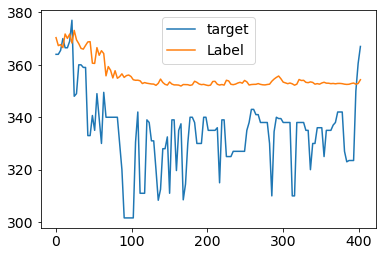

In [25]:
df_test15[df_test15['shoe_size_9']==1][['target','Label']].plot()


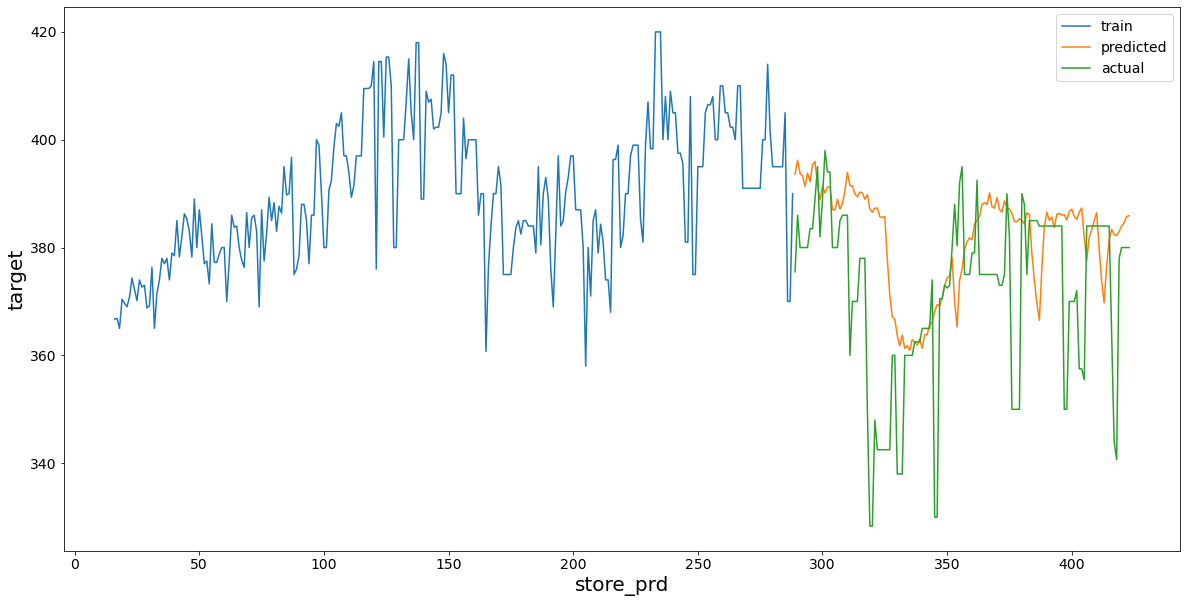

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = sns.lineplot(data=train_win15[train_win15['shoe_size_11']==1], x='store_prd', y='target', label='train', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='Label', label='predicted', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='target', label='actual', ax=ax)